## Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

## Import and Examine Data

In [2]:
# Import data
data = pd.read_csv('./log2.csv')

# Examine features
data.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
# Determine how many classes
np.unique(data['Action'])

array(['allow', 'deny', 'drop', 'reset-both'], dtype=object)

In [4]:
# Search for Missing Values
data.isna().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [5]:
# Data study
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
Source Port             65532 non-null int64
Destination Port        65532 non-null int64
NAT Source Port         65532 non-null int64
NAT Destination Port    65532 non-null int64
Action                  65532 non-null object
Bytes                   65532 non-null int64
Bytes Sent              65532 non-null int64
Bytes Received          65532 non-null int64
Packets                 65532 non-null int64
Elapsed Time (sec)      65532 non-null int64
pkts_sent               65532 non-null int64
pkts_received           65532 non-null int64
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


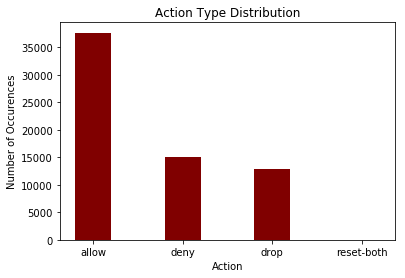

In [6]:
action_type, action_type_occurence = np.unique(data.Action, return_counts = True)
plt.bar(action_type, action_type_occurence, color ='maroon',
        width = 0.4)
 
plt.xlabel("Action")
plt.ylabel("Number of Occurences")
plt.title("Action Type Distribution")
plt.show()

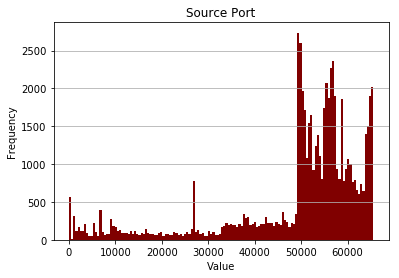

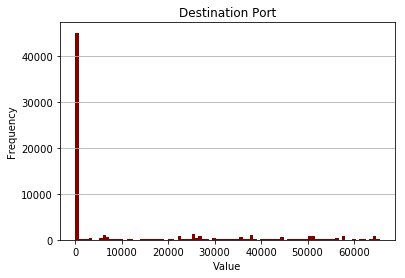

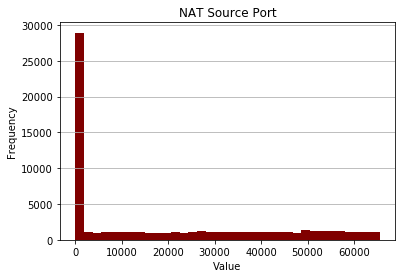

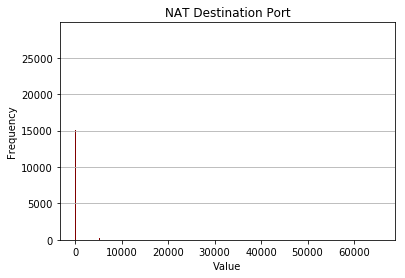

In [7]:
for i in np.arange(len(data.columns)-8):
  n, bins, patches = plt.hist(x=data.iloc[:, i], bins='auto', color='maroon')
  plt.grid(axis='y')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title(data.columns[i])
  maxfreq = n.max()
  plt.show()

## SVM Building the Model

In [8]:
# Separating the target variable from the rest of the dataset
x = data.loc[:, data.columns != 'Action']
y = data.Action

# Determine how many of each unique target result is in the dataset
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[['allow' 37640]
 ['deny' 14987]
 ['drop' 12851]
 ['reset-both' 54]]


In [9]:
# Split the dataset into test/train sets. This should also help the SVM run faster due to smaller training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [10]:
# Creating and fitting the model
my_model = SVC(C = 1, kernel = 'linear', decision_function_shape = 'ovo')
my_model.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
# Prediction values from x_test
prediction_SVM = my_model.predict(x_test)

In [12]:
# Determine how many classes were used when classifying
np.unique(prediction_SVM)

array(['allow', 'deny', 'drop'], dtype=object)

In [13]:
# Determine how each was classified
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[['allow' 7545]
 ['deny' 2994]
 ['drop' 2562]
 ['reset-both' 6]]


In [14]:
# accuracy score of model
accuracy_score(prediction_SVM,y_test)

0.9912260624093996

In [15]:
# cross-val score of model
cross_val_score(my_model, x_test, y_test, cv = 5, scoring = 'accuracy')

array([0.99237223, 0.9935164 , 0.99160626, 0.99236932, 0.98931705])

In [ ]:
for i in [1E-3, 1E-2, 1E-1, i, 10, 100, 1000]:
  my_model.C = i
  print(i, cross_val_score(my_model, x_test, y_test, cv = 5, scoring = 'accuracy'))

In [ ]:
# Creating and fitting the model
my_model_rbf = SVC(C = 1, kernel = 'rbf', decision_function_shape = 'ovo')
my_model_rbf.fit(x_train,y_train)

In [ ]:
prediction_SVM_rbf = my_model_rbf.predict(x_test)

In [ ]:
accuracy_score(prediction_SVM_rbf,y_test)

In [ ]:
cross_val_score(my_model_rbf, x_test, y_test, cv = 5, scoring = 'accuracy')

In [ ]:
for i in [1E-3, 1E-2, 1E-1, i, 10, 100, 1000]:
  my_model_rbf.C = i
  print(i, cross_val_score(my_model_rbf, x_test, y_test, cv = 5, scoring = 'accuracy'))

In [ ]:
SGD_model = SGDClassifier(loss = "log")

In [ ]:
SGD_model.fit(x_train, y_train)

In [ ]:
prediction_SGD = SGD_model.predict(x_test)

In [ ]:
accuracy_score(prediction_SGD,y_test)

In [ ]:
np.unique(prediction_SGD)